In [40]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import timedelta

from sklearn.preprocessing import minmax_scale

from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import silhouette_score
from tslearn.utils import to_time_series_dataset

import sys
import os
sys.path.append(os.path.abspath('../utils'))
from preprocessing import Preprocessor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [3]:
preprocessor = Preprocessor()
zpp4 = preprocessor.zpp4_preprocessing()
spec = preprocessor.spec_preprocessing()

Duplicate rows cleaning: 620it [00:02, 254.65it/s]


In [5]:
spec.supplier.unique()

array(['50 ЛЕТ ОКТЯБРЯ ООО', 'АВАНГАРД ДРУЖБА ООО', 'АВАНГАРД ООО', ...,
       'Ярушина В.С. ИП Глава К(Ф)Х', 'Яценко В.В. ИП Глава К(Ф)Х',
       'Яцкий И.В. ИП Глава К(Ф)Х'], dtype=object)

In [16]:
[len(zpp4.loc[zpp4['supplier'] == supplier]) for supplier in zpp4.supplier.unique()]

In [1]:
zpp4.loc[zpp4['supplier'] == '50 ЛЕТ ОКТЯБРЯ ООО'].head()

NameError: name 'zpp4' is not defined

In [4]:
spec.head(2)

,supplier,supplier_status,item,basis,spec_date,delivery_period_end,payment_terms,option,logistics,declared_price,consent_price,spec_price,volume_requested,volume_contracted,bids_submitted,bids_contracted,id
0,50 ЛЕТ ОКТЯБРЯ ООО,СХТП,подсолнечник,"Юг Руси, АО",2022-12-19,2022-12-25,По факту,15.0,0.0,25.5,25.0,25.0,40.0,60.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2022-12-19"
1,50 ЛЕТ ОКТЯБРЯ ООО,СХТП,подсолнечник,"Юг Руси, АО",2023-01-24,2023-02-12,По факту,15.0,0.0,27.5,27.5,27.5,50.0,59.0,1.0,1.0,"50 ЛЕТ ОКТЯБРЯ ООО_Юг Руси, АО_2023-01-24"


In [5]:
zpp4.head(2)

,date,supplier,basis,spec_date,contract_price,estimated_price,contract_price1,estimated_price1,quantity,sum,price_change,id
0,2022-07-02,СОЮЗ ООО Ростов,"Юг Руси, АО",2022-06-15,30.0,30.29,30.0,30.32,27.05,820156.0,1.07,"СОЮЗ ООО Ростов_Юг Руси, АО_2022-06-15"
1,2022-07-02,СОЮЗ ООО Ростов,"Юг Руси, АО",2022-06-15,30.0,30.29,30.0,31.02,28.78,892755.6,3.40,"СОЮЗ ООО Ростов_Юг Руси, АО_2022-06-15"


In [65]:
dates = zpp4[zpp4['supplier'] == 'СОЮЗ ООО Ростов']['date'].values

In [70]:
intervals = (dates[1:] - dates[:-1]).astype('timedelta64[D]').astype(int)

In [82]:
for supplier in zpp4['supplier'].unique():
    dates = zpp4[zpp4['supplier'] == supplier]['date'].values
    intervals = (dates[1:] - dates[:-1]).astype('timedelta64[D]').astype(int)
    zpp4.loc[zpp4['supplier'] == supplier, 'supplier_mean_interval'] = intervals.mean()
    zpp4.loc[zpp4['supplier'] == supplier, 'supplier_std_interval'] = intervals.std()

<Axes: xlabel='supplier_std_interval', ylabel='Count'>

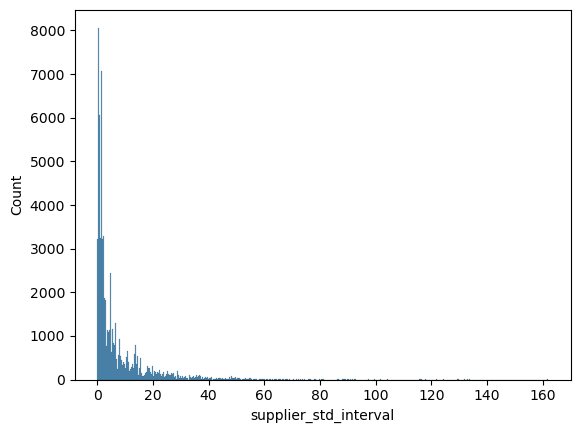

In [83]:
sns.histplot(zpp4['supplier_std_interval'])